Meme base et traitement que le notebook de comparaison des Regressors 

In [1]:
import shap
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np 
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor
import xgboost as xgb
import multiprocessing
from xgboost import XGBRegressor
from category_encoders import TargetEncoder
from category_encoders import TargetEncoder
import category_encoders as ce
from category_encoders import QuantileEncoder
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from julearn import run_cross_validation
from julearn.utils import configure_logging
from julearn.model_selection import StratifiedGroupsKFold
from julearn.scoring import register_scorer

import math

In [2]:
buildingnr= pd.read_csv("buildingnr.csv",decimal=".",index_col=0)
base_ml = buildingnr

In [3]:
buildingnr['log_TotalGHGEmissions_class']= pd.qcut(buildingnr['log_TotalGHGEmissions'],4,labels=False)


In [4]:
base_ml = buildingnr[['log_TotalGHGEmissions_class','log_TotalGHGEmissions',
                       'YearsENERGYSTARCertified', 'ENERGYSTARScore',
 'Distribution Center_GFA',
 'Electricity%',
 'NaturalGas%',
 'LPU1%',
 'LPU2%',
 'Data Center_eui%',
 'College/University_GFA%',
 'Other_GFA%',
 'Restaurant_GFA',
 'Worship Facility_GFA',
 'Other_eui%',
 'Non-Refrigerated Warehouse_GFA%',
 'DecBuilt',
 'Office_eui%',
 'Distribution Center_GFA%',
 'Non-Refrigerated Warehouse_eui%',
 'BuildingType',
 'Other - Entertainment/Public Assembly_GFA',
 'Retail Store_GFA',
 'Non-Refrigerated Warehouse_GFA',
 'Manufacturing/Industrial Plant_GFA',
 'Office_GFA',
 'Parking_eui%',
 'Retail Store_GFA%',
 'log_PropertyGFATotal',
 'parking%',
 'LargestPropertyUseType',
 'PrimaryPropertyType',
 'log_NaturalGas%',
 'log_Electricity%',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'Office_GFA%',
 'NumberofFloors',
 'PropertyGFATotal',
 'LargestUse',
 'PropertyGFABuilding(s)',
# 'ListOfAllPropertyUseTypes',
 'log_parking%',
 'Other_GFA',
 'SecondLargestPropertyUseType',
 'log_PropertyGFABuilding(s)',
 'SecondLargestPropertyUseTypeGFA',
 'log_LargestPropertyUseTypeGFA',
 'log_SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'log_ThirdLargestPropertyUseTypeGFA']]

In [5]:
base_ml.shape
base_ml.reset_index(inplace = True )
Report = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
#initialisation tableau de reporting
Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
#initialisation tableau de reporting


In [6]:
colonnes = base_ml.select_dtypes(include= 'object').columns.tolist()
for col in colonnes : 
    mask = base_ml[col].isna()
    base_ml.loc[mask,col]= 'missing'
    
colonnes = base_ml.select_dtypes(include= 'number').columns.tolist()
for col in colonnes : 
    mask = base_ml[col].isna()
    base_ml.loc[mask,col]= 0    

In [7]:
X = base_ml.drop(['log_TotalGHGEmissions_class','log_TotalGHGEmissions'],axis=1)
y = base_ml['log_TotalGHGEmissions']


In [8]:
colQE= base_ml.select_dtypes(include= 'object').columns.tolist()

enc = QuantileEncoder(cols=colQE, quantile=0.5, m=0).fit(X, y)
X_QE= enc.transform(X)

X_QE=enc.transform(X)
X=X_QE.drop(columns='index')



Faire varier les différents hyperparametres pour déterminer les plus efficaces.

In [9]:
debut=  time.time()
nsplit =5
courbe_param =pd.DataFrame(columns=['Parametre', 'R2 test']) 


numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

for i in range(1,50,1) : 
    
    param = [i]
   
    
    tuned_parameters =  {'n_estimators': [100], 
    'max_depth': [i],
    'gamma':[0.1], 
    'subsample':[0.7], 
    'reg_lambda':[0.1], 
    'reg_alpha':[0.1],
    'n_jobs':[-1],
     'booster':['gbtree']
                        }
    
    reg = Pipeline(steps=[('preprocessor', numeric_transformer),
                          ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                           max_depth = i , gamma = 0.1, subsample = 0.7, reg_lambda= 0.1,
                            reg_alpha = 0.1, booster = 'gbtree' , n_estimators = 100                                                         
                                                         ))]) 
                      
               

    skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
    Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
 
    for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)
  
    
        Fold_result_temp = pd.DataFrame([['XGB Regressor', 
                          np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold)),3),
                           np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold),squared=False),3),
                          np.around(r2_score(y_test_fold,reg.predict(x_test_fold)),3),
                         np.around( mean_absolute_percentage_error(y_test_fold,reg.predict(x_test_fold)),3),
                          np.around(r2_score(y_train_fold,reg.predict(x_train_fold)),3) ,
                          time.time() - debut]], 
                         columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
        Fold_result = pd.concat([Fold_result, Fold_result_temp])
        pass


    Append = pd.DataFrame([['XGB Regressor', 
                        np.around (Fold_result['MSE'].mean(),3),
                       np.around(Fold_result['RMSE'].mean(),3),
                      np.around(Fold_result['R2 Test'].mean(),3),
                     np.around( Fold_result['MA%E'].mean(),3),
                      np.around(Fold_result['R2 Train'].mean(),3) ,
                      np.around(Fold_result['Durée'].mean(),3) ]], 
                      columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    Report = pd.concat([Report, Append]) 
    append_param=pd.DataFrame([[i,Fold_result['R2 Test'].mean()]],columns=['Parametre', 'R2 test'])
    courbe_param = pd.concat([courbe_param,append_param])

    
      
Fold_result


,méthode,MSE,RMSE,R2 Test,MA%E,R2 Train,Durée
0,XGB Regressor,0.461,0.679,0.8,0.235,0.996,523.145958
0,XGB Regressor,0.439,0.663,0.808,2391625079554.556152,0.996,524.504327
0,XGB Regressor,0.414,0.643,0.815,63695599638597.148438,0.996,525.895736
0,XGB Regressor,0.418,0.647,0.822,0.224,0.996,527.20349
0,XGB Regressor,0.438,0.662,0.794,11110503176179.632812,0.996,528.508123


In [10]:
courbe_param

,Parametre,R2 test
0,1,0.8362
0,2,0.8378
0,3,0.841
0,4,0.8378
0,5,0.8272
0,6,0.8278
0,7,0.812
0,8,0.813
0,9,0.8154
0,10,0.8084


[Text(0.5, 1.0, 'XGB Regressor  - max_depth')]

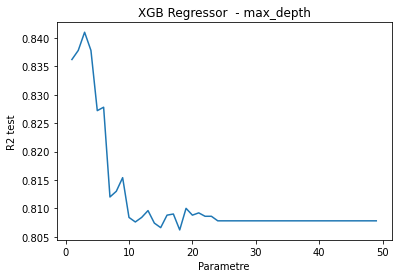

In [11]:
sns.lineplot( data=courbe_param.reset_index(),   x="Parametre", y="R2 test",  palette="bright", legend = "auto").set(
    title="XGB Regressor  - max_depth")
#print ("Meilleur R2 " , max(R2))

In [12]:

debut=  time.time()
nsplit =5
courbe_param =pd.DataFrame(columns=['Parametre', 'R2 test']) 
courbe_param.astype('float64').dtypes
append_param.astype('float64').dtypes

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

for i in range(0,100,10) : 
    
    param = [i/100]
       
        
    reg = Pipeline(steps=[('preprocessor', numeric_transformer),
                          ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                           max_depth = 3 , gamma = i/100, subsample = 0.7, reg_lambda= 0.1,
                            reg_alpha = 0.1, booster = 'gbtree' , n_estimators = 100                                                         
                                                         ))]) 
                      
          
                 
    skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
    Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
 
    for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)
  
    
        Fold_result_temp = pd.DataFrame([['XGB Regressor', 
                          np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold)),3),
                           np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold),squared=False),3),
                          np.around(r2_score(y_test_fold,reg.predict(x_test_fold)),3),
                         np.around( mean_absolute_percentage_error(y_test_fold,reg.predict(x_test_fold)),3),
                          np.around(r2_score(y_train_fold,reg.predict(x_train_fold)),3) ,
                          time.time() - debut]], 
                         columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
        Fold_result = pd.concat([Fold_result, Fold_result_temp])
        pass


    Append = pd.DataFrame([['XGB Regressor', 
                        np.around (Fold_result['MSE'].mean(),3),
                       np.around(Fold_result['RMSE'].mean(),3),
                      np.around(Fold_result['R2 Test'].mean(),3),
                     np.around( Fold_result['MA%E'].mean(),3),
                      np.around(Fold_result['R2 Train'].mean(),3) ,
                      np.around(Fold_result['Durée'].mean(),3) ]], 
                      columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    Report = pd.concat([Report, Append]) 
    append_param=pd.DataFrame([[i,Fold_result['R2 Test'].mean()]],columns=['Parametre', 'R2 test'])
    courbe_param = pd.concat([courbe_param,append_param])

    
      
Fold_result

,méthode,MSE,RMSE,R2 Test,MA%E,R2 Train,Durée
0,XGB Regressor,0.347,0.589,0.849,0.187,0.951,15.993478
0,XGB Regressor,0.329,0.573,0.856,1546871320914.385986,0.951,16.337687
0,XGB Regressor,0.363,0.603,0.838,64265096540698.804688,0.947,16.68077
0,XGB Regressor,0.36,0.6,0.847,0.213,0.953,17.056766
0,XGB Regressor,0.37,0.609,0.825,17714073856716.34375,0.949,17.411816


In [13]:
courbe_param

,Parametre,R2 test
0,0,0.8402
0,10,0.841
0,20,0.836
0,30,0.841
0,40,0.8408
0,50,0.8416
0,60,0.8396
0,70,0.843
0,80,0.842
0,90,0.843


[Text(0.5, 1.0, 'XGB Regressor  - gamma')]

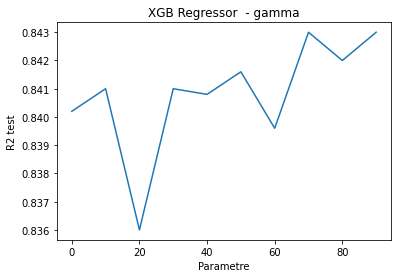

In [14]:
sns.lineplot( data=courbe_param.reset_index(),   x="Parametre", y="R2 test",  palette="bright", legend = "auto").set(
    title="XGB Regressor  - gamma")


In [15]:
debut=  time.time()
nsplit =5
param_courbe = []
R2 = []
courbe_param =pd.DataFrame(columns=['Parametre', 'R2 test']) 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

for compteur in range(0,100,10) : 
    
    i = compteur/100
       
  
   

    reg = Pipeline(steps=[('preprocessor', numeric_transformer),
                          ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                           max_depth = 3 , gamma = 0.2, subsample = i, reg_lambda= 0.1,
                            reg_alpha = 0.1, booster = 'gbtree' , n_estimators = 100                                                         
                                                         ))])  
    
         

    skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
    Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
 
    for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)
  
    
        Fold_result_temp = pd.DataFrame([['XGB', 
                          np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold)),3),
                           np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold),squared=False),3),
                          np.around(r2_score(y_test_fold,reg.predict(x_test_fold)),3),
                         np.around( mean_absolute_percentage_error(y_test_fold,reg.predict(x_test_fold)),3),
                          np.around(r2_score(y_train_fold,reg.predict(x_train_fold)),3) ,
                          time.time() - debut]], 
                         columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
        Fold_result = pd.concat([Fold_result, Fold_result_temp])
        pass


    Append = pd.DataFrame([['XBG', 
                        np.around (Fold_result['MSE'].mean(),3),
                       np.around(Fold_result['RMSE'].mean(),3),
                      np.around(Fold_result['R2 Test'].mean(),3),
                     np.around( Fold_result['MA%E'].mean(),3),
                      np.around(Fold_result['R2 Train'].mean(),3) ,
                      np.around(Fold_result['Durée'].mean(),3) ]], 
                      columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    Report = pd.concat([Report, Append]) 
    append_param=pd.DataFrame([[i,Fold_result['R2 Test'].mean()]],columns=['Parametre', 'R2 test'])
    courbe_param = pd.concat([courbe_param,append_param])
      
Fold_result


,méthode,MSE,RMSE,R2 Test,MA%E,R2 Train,Durée
0,XGB,0.346,0.588,0.85,0.172,0.97,13.982399
0,XGB,0.34,0.583,0.852,11028449886709.232422,0.967,14.328473
0,XGB,0.385,0.62,0.828,72028026642457.25,0.965,14.796352
0,XGB,0.347,0.589,0.852,0.187,0.965,15.185312
0,XGB,0.337,0.581,0.841,19969537725446.445312,0.965,15.723128


In [16]:
courbe_param

,Parametre,R2 test
0,0.0,-5.337
0,0.1,0.7152
0,0.2,0.7824
0,0.3,0.826
0,0.4,0.8362
0,0.5,0.8316
0,0.6,0.8416
0,0.7,0.836
0,0.8,0.844
0,0.9,0.8446


[Text(0.5, 1.0, 'XGB Regressor  - subsample')]

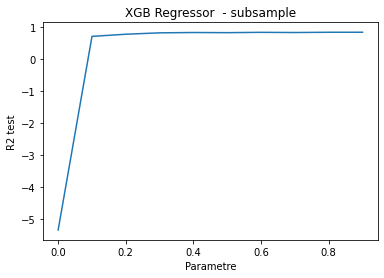

In [17]:

sns.lineplot( data=courbe_param.reset_index(),   x="Parametre", y="R2 test",  palette="bright", legend = "auto").set(
    title="XGB Regressor  - subsample")

In [18]:
debut=  time.time()
nsplit =5
param_courbe = []
R2 = []
courbe_param =pd.DataFrame(columns=['Parametre', 'R2 test']) 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

for compteur in range(0,100,10) : 
    
    i = compteur/100
       
      
    reg = Pipeline(steps=[('preprocessor', numeric_transformer),
                          ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                           max_depth = 3 , gamma = 0.2, subsample = 0.7, reg_lambda= i,
                            reg_alpha = 0.1, booster = 'gbtree' , n_estimators = 100                                                         
                                                         ))])  
    
            

    skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
    Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
 
    for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)
  
    
        Fold_result_temp = pd.DataFrame([['XGBoost', 
                          np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold)),3),
                           np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold),squared=False),3),
                          np.around(r2_score(y_test_fold,reg.predict(x_test_fold)),3),
                         np.around( mean_absolute_percentage_error(y_test_fold,reg.predict(x_test_fold)),3),
                          np.around(r2_score(y_train_fold,reg.predict(x_train_fold)),3) ,
                          time.time() - debut]], 
                         columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
        Fold_result = pd.concat([Fold_result, Fold_result_temp])
        pass


    Append = pd.DataFrame([['XGBoost', 
                        np.around (Fold_result['MSE'].mean(),3),
                       np.around(Fold_result['RMSE'].mean(),3),
                      np.around(Fold_result['R2 Test'].mean(),3),
                     np.around( Fold_result['MA%E'].mean(),3),
                      np.around(Fold_result['R2 Train'].mean(),3) ,
                      np.around(Fold_result['Durée'].mean(),3) ]], 
                      columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    Report = pd.concat([Report, Append]) 
    append_param=pd.DataFrame([[i,Fold_result['R2 Test'].mean()]],columns=['Parametre', 'R2 test'])
    courbe_param = pd.concat([courbe_param,append_param])

    
       
    R2.append(Fold_result['R2 Test'].mean())


    
Fold_result


,méthode,MSE,RMSE,R2 Test,MA%E,R2 Train,Durée
0,XGBoost,0.311,0.558,0.865,0.181,0.959,16.274061
0,XGBoost,0.302,0.55,0.868,7182153164180.143555,0.962,16.609316
0,XGBoost,0.35,0.592,0.844,53309784233552.039062,0.961,16.947412
0,XGBoost,0.371,0.609,0.842,0.193,0.963,17.276533
0,XGBoost,0.348,0.59,0.836,22280687953128.605469,0.96,17.606805


In [19]:
courbe_param

,Parametre,R2 test
0,0.0,0.8392
0,0.1,0.836
0,0.2,0.8392
0,0.3,0.8396
0,0.4,0.8472
0,0.5,0.843
0,0.6,0.842
0,0.7,0.8476
0,0.8,0.8412
0,0.9,0.851


[Text(0.5, 1.0, 'XGB Regressor  - reg lambda')]

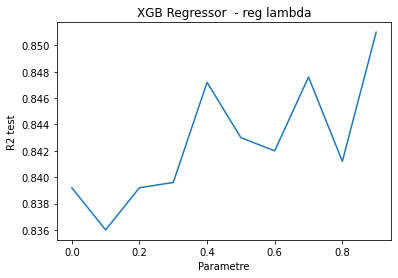

In [20]:
sns.lineplot( data=courbe_param.reset_index(),   x="Parametre", y="R2 test",  palette="bright", legend = "auto").set(
    title="XGB Regressor  - reg lambda")

In [21]:
debut=  time.time()
nsplit =5
param_courbe = []
R2 = []
courbe_param =pd.DataFrame(columns=['Parametre', 'R2 test']) 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

for compteur in range(0,100,10) : 
    
    i = compteur/100
       
   
    
    reg = Pipeline(steps=[('preprocessor', numeric_transformer),
                          ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                           max_depth = 3 , gamma = 0.2, subsample = 0.7, reg_lambda= 0,
                            reg_alpha = i, booster = 'gbtree' , n_estimators = 100                                                         
                                                         ))])   
    
         
                      

    skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
    Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
 
    for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)
  
    
        Fold_result_temp = pd.DataFrame([['XGBoost', 
                          np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold)),3),
                           np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold),squared=False),3),
                          np.around(r2_score(y_test_fold,reg.predict(x_test_fold)),3),
                         np.around( mean_absolute_percentage_error(y_test_fold,reg.predict(x_test_fold)),3),
                          np.around(r2_score(y_train_fold,reg.predict(x_train_fold)),3) ,
                          time.time() - debut]], 
                         columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
        Fold_result = pd.concat([Fold_result, Fold_result_temp])
        pass


    Append = pd.DataFrame([['XGBoost', 
                        np.around (Fold_result['MSE'].mean(),3),
                       np.around(Fold_result['RMSE'].mean(),3),
                      np.around(Fold_result['R2 Test'].mean(),3),
                     np.around( Fold_result['MA%E'].mean(),3),
                      np.around(Fold_result['R2 Train'].mean(),3) ,
                      np.around(Fold_result['Durée'].mean(),3) ]], 
                      columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    Report = pd.concat([Report, Append]) 
    append_param=pd.DataFrame([[i,Fold_result['R2 Test'].mean()]],columns=['Parametre', 'R2 test'])
    courbe_param = pd.concat([courbe_param,append_param])

    
       
    R2.append(Fold_result['R2 Test'].mean())


    
Fold_result


,méthode,MSE,RMSE,R2 Test,MA%E,R2 Train,Durée
0,XGBoost,0.361,0.6,0.843,0.18,0.961,16.262189
0,XGBoost,0.309,0.555,0.865,17817883620568.25,0.961,16.59829
0,XGBoost,0.389,0.624,0.826,68242761635057.273438,0.96,16.929501
0,XGBoost,0.341,0.584,0.855,0.192,0.961,17.2666
0,XGBoost,0.357,0.598,0.831,27576693882478.121094,0.96,17.597714


In [22]:
courbe_param

,Parametre,R2 test
0,0.0,0.832
0,0.1,0.8392
0,0.2,0.839
0,0.3,0.8442
0,0.4,0.8418
0,0.5,0.8492
0,0.6,0.841
0,0.7,0.8464
0,0.8,0.8456
0,0.9,0.844


[Text(0.5, 1.0, 'XGB Regressor  - reg alpha')]

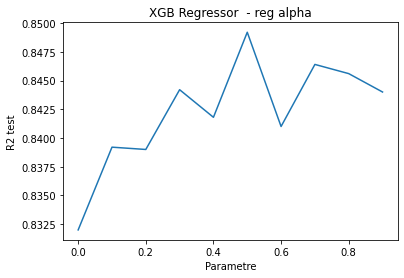

In [23]:
sns.lineplot( data=courbe_param.reset_index(),   x="Parametre", y="R2 test",  palette="bright", legend = "auto").set(
    title="XGB Regressor  - reg alpha")

In [24]:
debut=  time.time()
nsplit =5
param_courbe = []
R2 = []
courbe_param =pd.DataFrame(columns=['Parametre', 'R2 test']) 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

for compteur in range(0,100,10) : 
    
    i = compteur/100
       
    tuned_parameters =  {'n_estimators': [100], 
    'max_depth': [1],
    'gamma':[0],
    'subsample':[0.1], 
    'reg_lambda':[0], 
    'reg_alpha':[0],
    'n_jobs':[-1],
     'learning_rate':[i],                    
     'booster':['gbtree'] }
    
    reg = Pipeline(steps=[('preprocessor', numeric_transformer),
                          ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                           max_depth = 3 , gamma = 0.2, subsample = 0.7, reg_lambda= 0,
                            reg_alpha = 0.9, booster = 'gbtree' , n_estimators = 100, learning_rate = i                                                        
                                                         ))])   
   
    
    
                      

    skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
    Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
 
    for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)
  
    
        Fold_result_temp = pd.DataFrame([['XGBoost', 
                          np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold)),3),
                           np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold),squared=False),3),
                          np.around(r2_score(y_test_fold,reg.predict(x_test_fold)),3),
                         np.around( mean_absolute_percentage_error(y_test_fold,reg.predict(x_test_fold)),3),
                          np.around(r2_score(y_train_fold,reg.predict(x_train_fold)),3) ,
                          time.time() - debut]], 
                         columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
        Fold_result = pd.concat([Fold_result, Fold_result_temp])
        pass


    Append = pd.DataFrame([['XGBoost', 
                        np.around (Fold_result['MSE'].mean(),3),
                       np.around(Fold_result['RMSE'].mean(),3),
                      np.around(Fold_result['R2 Test'].mean(),3),
                     np.around( Fold_result['MA%E'].mean(),3),
                      np.around(Fold_result['R2 Train'].mean(),3) ,
                      np.around(Fold_result['Durée'].mean(),3) ]], 
                      columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    Report = pd.concat([Report, Append]) 
    append_param=pd.DataFrame([[i,Fold_result['R2 Test'].mean()]],columns=['Parametre', 'R2 test'])
    courbe_param = pd.concat([courbe_param,append_param])
        
Fold_result

,méthode,MSE,RMSE,R2 Test,MA%E,R2 Train,Durée
0,XGBoost,0.533,0.73,0.769,0.215,0.976,15.772222
0,XGBoost,0.639,0.799,0.721,671999124633.708984,0.975,16.104465
0,XGBoost,0.614,0.784,0.726,64509403999993.226562,0.976,16.451537
0,XGBoost,0.55,0.742,0.766,0.244,0.974,16.796615
0,XGBoost,0.567,0.753,0.733,9975439495494.896484,0.977,17.132716


In [25]:
courbe_param

,Parametre,R2 test
0,0.0,-5.337
0,0.1,0.8462
0,0.2,0.8466
0,0.3,0.844
0,0.4,0.8398
0,0.5,0.821
0,0.6,0.8058
0,0.7,0.772
0,0.8,0.7668
0,0.9,0.743


[Text(0.5, 1.0, 'XGB Regressor  - learning rate')]

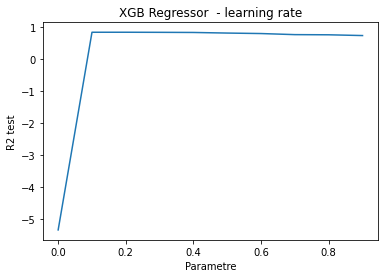

In [26]:

sns.lineplot( data=courbe_param.reset_index(),   x="Parametre", y="R2 test",  palette="bright", legend = "auto").set(
    title="XGB Regressor  - learning rate")

In [27]:
nsplit =5
param_courbe = []
R2 = []
courbe_param =pd.DataFrame(columns=['Parametre', 'R2 test']) 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

for i in range(0,100,10):

    enc = QuantileEncoder(cols=base_ml.select_dtypes(include= 'object').columns,quantile=i/100, m=1.0).fit(X, y) 
    X_QE= enc.transform(X)
    X=X_QE
    
    param = [i/100]
    param_courbe.append(i/100)
    
    tuned_parameters =  {'n_estimators': [100], 
    'max_depth': [1],
    'gamma':[0],
    'subsample':[0.1], 
    'reg_lambda':[0], 
    'reg_alpha':[0],
    'n_jobs':[-1],
     'booster':['gbtree'] }
    
    reg = Pipeline(steps=[('preprocessor', numeric_transformer),
                          ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                        max_depth = 3 , gamma = 0.2, subsample = 0.7, reg_lambda= 0,
                            reg_alpha = 0.9, booster = 'gbtree' , n_estimators = 100, learning_rate = 0.2
                                                         ))])
          
                          

    skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
    Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
 
    for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)
  
    
        Fold_result_temp = pd.DataFrame([['XGB', 
                        np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold)),3),
                        np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold),squared=False),3),
                        np.around(r2_score(y_test_fold,reg.predict(x_test_fold)),3),
                        np.around( mean_absolute_percentage_error(y_test_fold,reg.predict(x_test_fold)),3),
                        np.around(r2_score(y_train_fold,reg.predict(x_train_fold)),3) ,
                        time.time() - debut]], 
                        columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
        Fold_result = pd.concat([Fold_result, Fold_result_temp])
        pass


    Append = pd.DataFrame([['XGB', 
                        np.around (Fold_result['MSE'].mean(),3),
                        np.around(Fold_result['RMSE'].mean(),3),
                        np.around(Fold_result['R2 Test'].mean(),3),
                        np.around( Fold_result['MA%E'].mean(),3),
                        np.around(Fold_result['R2 Train'].mean(),3) ,
                        np.around(Fold_result['Durée'].mean(),3) ]], 
                        columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    Report = pd.concat([Report, Append]) 
    append_param=pd.DataFrame([[i,Fold_result['R2 Test'].mean()]],columns=['Parametre', 'R2 test'])
    courbe_param = pd.concat([courbe_param,append_param])
    
    
    R2.append(Fold_result['R2 Test'].mean())
      
Fold_result

,méthode,MSE,RMSE,R2 Test,MA%E,R2 Train,Durée
0,XGB,0.364,0.604,0.842,0.18,0.945,34.775481
0,XGB,0.309,0.556,0.865,2759680873613.095215,0.946,35.120676
0,XGB,0.37,0.608,0.835,57995455641694.125,0.946,35.461764
0,XGB,0.353,0.594,0.85,0.194,0.949,35.798862
0,XGB,0.323,0.568,0.848,20565882735961.707031,0.942,36.146932


In [28]:
courbe_param

,Parametre,R2 test
0,0,0.856
0,10,0.851
0,20,0.8528
0,30,0.8536
0,40,0.852
0,50,0.8454
0,60,0.8488
0,70,0.8492
0,80,0.8486
0,90,0.848


[Text(0.5, 1.0, 'XGB Regressor  - Quantile Encoder - quantile')]

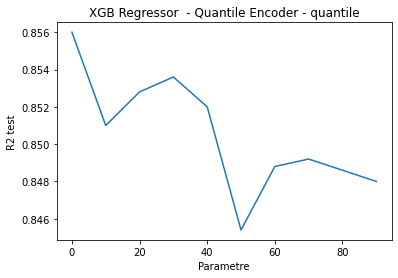

In [29]:

sns.lineplot( data=courbe_param.reset_index(),   x="Parametre", y="R2 test",  palette="bright", legend = "auto").set(
    title="XGB Regressor  - Quantile Encoder - quantile")

In [30]:
nsplit =5
param_courbe = []

courbe_param =pd.DataFrame(columns=['Parametre', 'R2 test']) 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

for i in range(0,100,10):

    enc = QuantileEncoder(cols=base_ml.select_dtypes(include= 'object').columns,quantile= 0.5, m=i/100).fit(X, y) 
    X_QE= enc.transform(X)
    X=X_QE
    
    param = [i/100]
    param_courbe.append(i/100)
    
  
    
    reg = Pipeline(steps=[('preprocessor', numeric_transformer),
                          ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                              max_depth = 3 , gamma = 0.2, subsample = 0.7, reg_lambda= 0,
                            reg_alpha = 0.9, booster = 'gbtree' , n_estimators = 100, learning_rate = 0.2
                                                         ))])
    

                      

    skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
    Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
 
    for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)
  
    
        Fold_result_temp = pd.DataFrame([['XGB', 
                        np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold)),3),
                        np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold),squared=False),3),
                        np.around(r2_score(y_test_fold,reg.predict(x_test_fold)),3),
                        np.around( mean_absolute_percentage_error(y_test_fold,reg.predict(x_test_fold)),3),
                        np.around(r2_score(y_train_fold,reg.predict(x_train_fold)),3) ,
                        time.time() - debut]], 
                        columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
        Fold_result = pd.concat([Fold_result, Fold_result_temp])
        pass


    Append = pd.DataFrame([['XGB', 
                        np.around (Fold_result['MSE'].mean(),3),
                        np.around(Fold_result['RMSE'].mean(),3),
                        np.around(Fold_result['R2 Test'].mean(),3),
                        np.around( Fold_result['MA%E'].mean(),3),
                        np.around(Fold_result['R2 Train'].mean(),3) ,
                        np.around(Fold_result['Durée'].mean(),3) ]], 
                        columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    Report = pd.concat([Report, Append]) 
    append_param=pd.DataFrame([[i,Fold_result['R2 Test'].mean()]],columns=['Parametre', 'R2 test'])
    courbe_param = pd.concat([courbe_param,append_param])
    
    
    R2.append(Fold_result['R2 Test'].mean())
      
Fold_result

,méthode,MSE,RMSE,R2 Test,MA%E,R2 Train,Durée
0,XGB,0.345,0.587,0.85,0.166,0.948,53.751432
0,XGB,0.301,0.548,0.869,5278881750664.398438,0.945,54.089649
0,XGB,0.39,0.624,0.826,65858253583927.0,0.947,54.433729
0,XGB,0.341,0.584,0.855,0.196,0.951,54.782796
0,XGB,0.36,0.6,0.83,24780087190258.039062,0.945,55.128871


In [31]:
courbe_param

,Parametre,R2 test
0,0,0.8466
0,10,0.8482
0,20,0.8454
0,30,0.8488
0,40,0.8458
0,50,0.8452
0,60,0.8446
0,70,0.8464
0,80,0.8482
0,90,0.846


[Text(0.5, 1.0, 'XGB Regressor  - quantile encoder - m')]

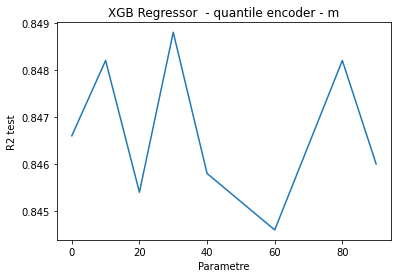

In [32]:

sns.lineplot( data=courbe_param.reset_index(),   x="Parametre", y="R2 test",  palette="bright", legend = "auto").set(
    title="XGB Regressor  - quantile encoder - m")

In [33]:
nsplit =5
param_courbe = []

courbe_param =pd.DataFrame(columns=['Parametre', 'R2 test']) 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

for i in range(1,1000,100):

    enc = QuantileEncoder(cols=base_ml.select_dtypes(include= 'object').columns,quantile= 0.5, m=0.2).fit(X, y) 
    X_QE= enc.transform(X)
    X=X_QE
    
    param = [i/100]
    param_courbe.append(i/100)
    
  
    
    reg = Pipeline(steps=[('preprocessor', numeric_transformer),
                          ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                              max_depth = 3 , gamma = 0.2, subsample = 0.7, reg_lambda= 0,
                            reg_alpha = 0.9, booster = 'gbtree' , n_estimators = i, learning_rate = 0.2
                                                         ))])
    

                      

    skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
    Fold_result = pd.DataFrame(columns=['méthode', 'MSE','RMSE','R2 Test',"MA%E",'R2 Train','Durée']) 
 
    for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)
  
    
        Fold_result_temp = pd.DataFrame([['XGB', 
                        np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold)),3),
                        np.around (mean_squared_error(y_test_fold,reg.predict(x_test_fold),squared=False),3),
                        np.around(r2_score(y_test_fold,reg.predict(x_test_fold)),3),
                        np.around( mean_absolute_percentage_error(y_test_fold,reg.predict(x_test_fold)),3),
                        np.around(r2_score(y_train_fold,reg.predict(x_train_fold)),3) ,
                        time.time() - debut]], 
                        columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
        Fold_result = pd.concat([Fold_result, Fold_result_temp])
        pass


    Append = pd.DataFrame([['XGB', 
                        np.around (Fold_result['MSE'].mean(),3),
                        np.around(Fold_result['RMSE'].mean(),3),
                        np.around(Fold_result['R2 Test'].mean(),3),
                        np.around( Fold_result['MA%E'].mean(),3),
                        np.around(Fold_result['R2 Train'].mean(),3) ,
                        np.around(Fold_result['Durée'].mean(),3) ]], 
                        columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    Report = pd.concat([Report, Append]) 
    append_param=pd.DataFrame([[i,Fold_result['R2 Test'].mean()]],columns=['Parametre', 'R2 test'])
    courbe_param = pd.concat([courbe_param,append_param])
    
    
    R2.append(Fold_result['R2 Test'].mean())
      
Fold_result

,méthode,MSE,RMSE,R2 Test,MA%E,R2 Train,Durée
0,XGB,0.336,0.579,0.854,0.167,0.984,113.948059
0,XGB,0.331,0.575,0.856,6831114700405.611328,0.983,116.569221
0,XGB,0.372,0.61,0.834,63604748602552.945312,0.983,119.175664
0,XGB,0.336,0.579,0.857,0.2,0.984,121.8277
0,XGB,0.359,0.599,0.831,17769358385906.03125,0.983,124.457954


In [34]:
courbe_param

,Parametre,R2 test
0,1,-3.2062
0,101,0.8454
0,201,0.8482
0,301,0.848
0,401,0.8476
0,501,0.8472
0,601,0.847
0,701,0.847
0,801,0.847
0,901,0.8464


[Text(0.5, 1.0, 'XGB Regressor  - nombres estimator')]

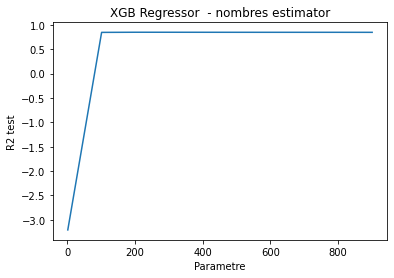

In [35]:
sns.lineplot( data=courbe_param.reset_index(),   x="Parametre", y="R2 test",  palette="bright", legend = "auto").set(
    title="XGB Regressor  - nombres estimator")

Analyse des Features importance avec la libray Shap

In [36]:
col_names=base_ml.drop(columns = 'DecBuilt').select_dtypes(include='number').columns.tolist()
features = base_ml[col_names]
scaler = StandardScaler().fit(features.values)
features_scale = scaler.transform(features.values)
base_ml[col_names] = features_scale
base_ml



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,log_TotalGHGEmissions_class,log_TotalGHGEmissions,YearsENERGYSTARCertified,ENERGYSTARScore,Distribution Center_GFA,Electricity%,NaturalGas%,LPU1%,LPU2%,...,log_parking%,Other_GFA,SecondLargestPropertyUseType,log_PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,log_LargestPropertyUseTypeGFA,log_SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,LargestPropertyUseTypeGFA,log_ThirdLargestPropertyUseTypeGFA
0,-1.730991,1.340984,1.030719,missing,0.436036,-0.148081,-0.561434,-0.391428,0.755351,-0.776544,...,0.455299,-0.180182,missing,0.462672,-0.367080,0.504529,-0.927856,missing,-0.036722,-0.493989
1,-1.728871,1.340984,1.142778,missing,0.462003,-0.148081,-1.164448,1.263998,-0.241098,0.167436,...,-2.830262,-0.180182,Parking,0.463513,-0.072507,0.456847,1.025538,Restaurant,-0.053111,1.873012
2,-1.726751,1.340984,2.442680,missing,-0.005403,-0.148081,-0.046171,-0.982940,0.755351,-0.776544,...,-2.239240,-0.180182,missing,2.814897,-0.367080,2.440372,-0.927856,missing,2.367441,-0.493989
3,-1.724631,1.340984,1.121237,missing,0.332168,-0.148081,-1.085370,-0.050571,0.755351,-0.776544,...,0.455299,-0.180182,missing,0.062131,-0.367080,0.174303,-0.927856,missing,-0.134298,-0.493989
4,-1.722511,1.340984,1.498357,missing,0.825542,-0.148081,-1.193974,1.293590,-1.106809,1.528830,...,-1.318723,-0.180182,Parking,0.736428,0.962819,0.805343,1.331608,Swimming Pool,0.089273,-0.493989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,1.722511,-0.446995,-0.618338,missing,0.072498,-0.148081,-0.293251,0.390845,0.755351,-0.776544,...,0.455299,-0.180182,missing,-1.695801,-0.367080,-1.275025,-0.927856,missing,-0.310729,-0.493989
1630,1.724631,-0.446995,-0.332797,missing,-1.121986,-0.148081,-1.048397,1.147686,0.755351,-0.776544,...,0.455299,-0.180182,missing,-1.407576,-0.367080,-1.037398,-0.927856,missing,-0.297392,-0.493989
1631,1.726751,1.340984,0.956376,missing,-1.121986,-0.148081,-1.451067,1.551260,-1.465529,1.972930,...,0.455299,-0.180182,Fitness Center/Health Club/Gym,-1.621586,-0.258082,-1.710819,0.823663,Swimming Pool,-0.327683,-0.493989
1632,1.728871,-0.446995,-0.582182,missing,-1.121986,-0.148081,-0.792737,0.891452,-1.939841,2.328931,...,0.455299,-0.180182,Fitness Center/Health Club/Gym,-1.545786,-0.239954,-1.835899,0.854901,Pre-school/Daycare,-0.331217,1.240070


In [37]:
colQE= base_ml.select_dtypes(include= 'object').columns.tolist()
colQE.append('DecBuilt')

enc = QuantileEncoder(cols=colQE, quantile=0.5, m=0.2).fit(X, y)
X_QE= enc.transform(X)

X=X_QE

In [38]:
X

,YearsENERGYSTARCertified,ENERGYSTARScore,Distribution Center_GFA,Electricity%,NaturalGas%,LPU1%,LPU2%,Data Center_eui%,College/University_GFA%,Other_GFA%,...,log_parking%,Other_GFA,SecondLargestPropertyUseType,log_PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,log_LargestPropertyUseTypeGFA,log_SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,LargestPropertyUseTypeGFA,log_ThirdLargestPropertyUseTypeGFA
0,3.873911,60.0,0.0,0.546060,0.176638,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,3.791468,11.390012,0.0,11.390012,0.000000,3.840754,88434.0,0.000000
1,3.873911,61.0,0.0,0.386609,0.613391,0.809918,0.145453,0.0,0.0,0.0,...,-1.927901,0.0,4.548537,11.390780,15064.0,11.337142,9.620063,4.696081,83880.0,8.438583
2,3.873911,43.0,0.0,0.682307,0.020579,1.000000,0.000000,0.0,0.0,0.0,...,-1.581102,0.0,3.791468,13.540273,0.0,13.536449,0.000000,3.840754,756493.0,0.000000
3,3.873911,56.0,0.0,0.407519,0.266567,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,3.791468,11.023861,0.0,11.023861,0.000000,3.840754,61320.0,0.000000
4,3.873911,75.0,0.0,0.378802,0.621198,0.644776,0.355224,0.0,0.0,0.0,...,-1.040960,0.0,4.548537,11.640263,68009.0,11.723551,11.127395,5.698898,123445.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,3.873911,46.0,0.0,0.616974,0.383026,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,3.791468,9.416867,0.0,9.416867,0.000000,3.840754,12294.0,0.000000
1630,3.873911,0.0,0.0,0.417296,0.582704,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,3.791468,9.680344,0.0,9.680344,0.000000,3.840754,16000.0,0.000000
1631,3.873911,0.0,0.0,0.310820,0.689180,0.576347,0.423653,0.0,0.0,0.0,...,0.000000,0.0,4.373651,9.484709,5574.0,8.933664,8.625868,5.698898,7583.0,0.000000
1632,3.873911,0.0,0.0,0.484898,0.515102,0.485868,0.478507,0.0,0.0,0.0,...,0.000000,0.0,4.373651,9.554001,6501.0,8.794976,8.779711,3.875994,6601.0,6.182085


In [39]:


reg =  xgb.XGBRegressor(objective='reg:squarederror', random_state = 22,
                              max_depth = 3 , gamma = 0.2, subsample = 0.7, reg_lambda= 0,
                            reg_alpha = 0.9, booster = 'gbtree' , n_estimators = 250, learning_rate = 0.2)

skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 )
for train_index, test_index in skf.split(X, buildingnr['log_TotalGHGEmissions_class']):
        x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        reg.fit(x_train_fold, y_train_fold)               

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


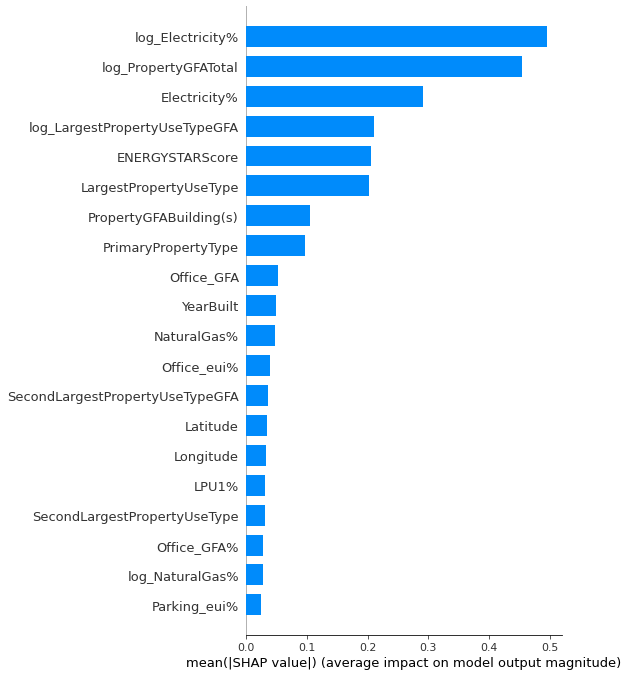

In [40]:
import shap
shap_values = shap.TreeExplainer(reg).shap_values(x_train_fold)
shap.summary_plot(shap_values, x_train_fold, plot_type="bar")

In [41]:


explainer = shap.Explainer(reg.predict, x_test_fold)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test_fold)



Permutation explainer: 327it [00:48,  5.75it/s]                                                                        


In [42]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

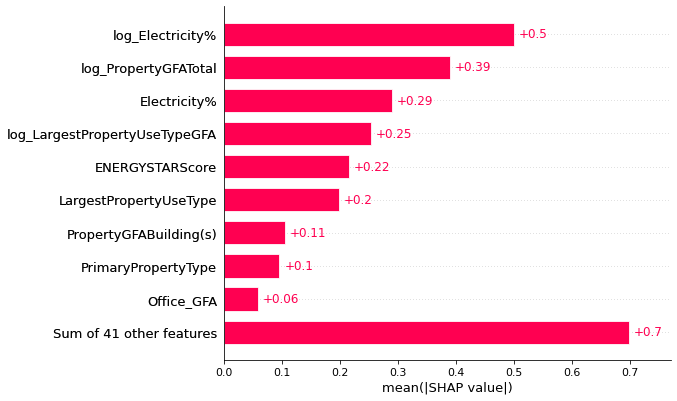

In [43]:
shap.plots.bar(shap_values)

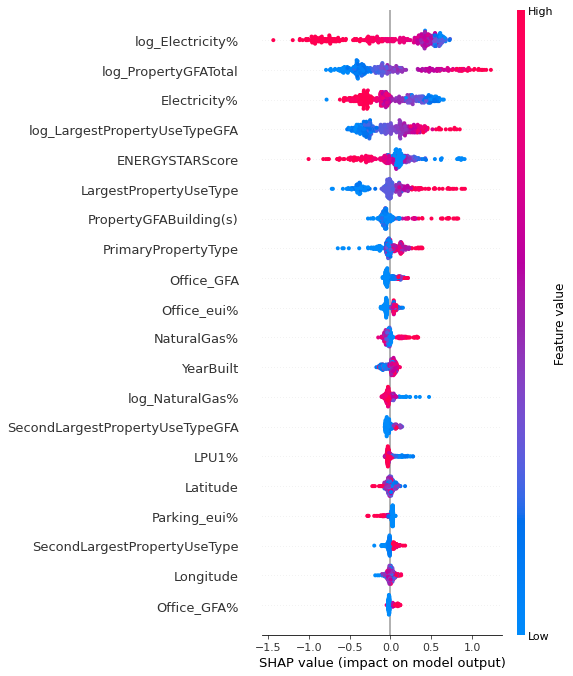

In [44]:
shap.summary_plot(shap_values)

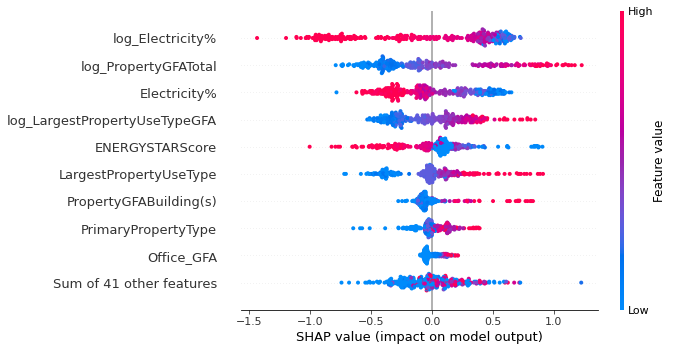

In [45]:
shap.plots.beeswarm(shap_values)

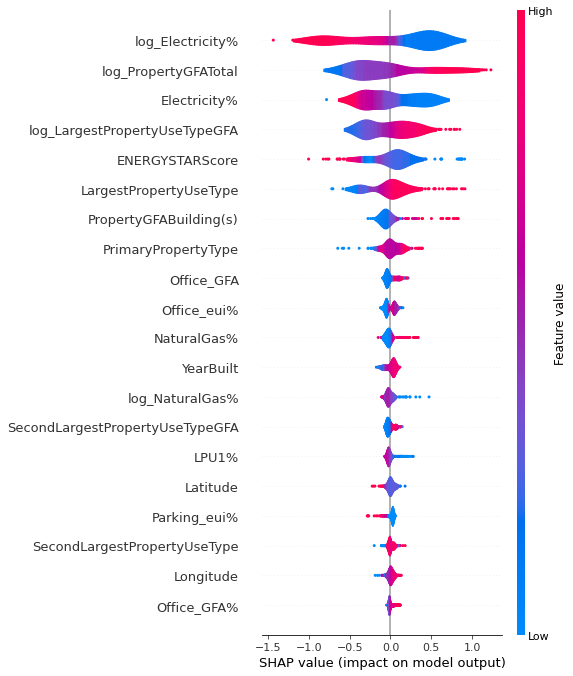

In [46]:
shap.summary_plot(shap_values, plot_type='violin')

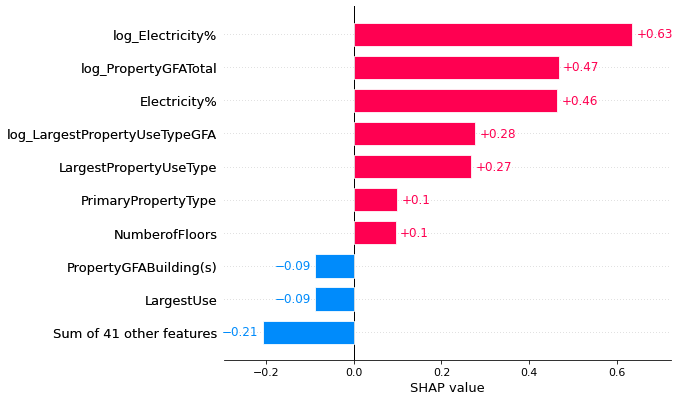

In [47]:
shap.plots.bar(shap_values[0])

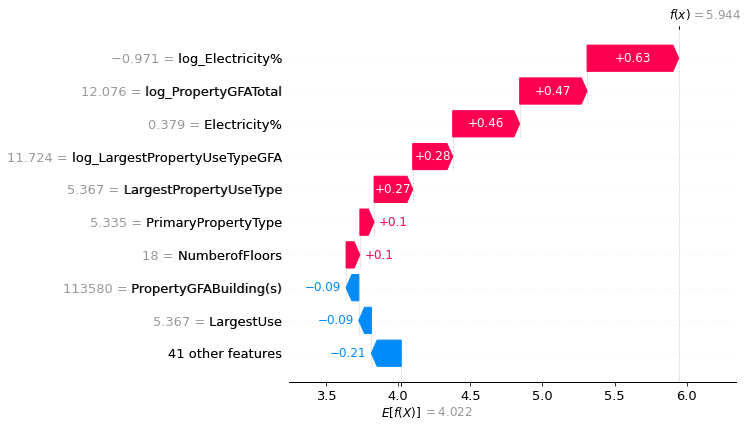

In [48]:
shap.plots.waterfall(shap_values[0])

In [49]:
shap.plots.force(shap_values[0])